<a href="https://colab.research.google.com/github/nafl13/ICT_DSA/blob/Daily_tasks/Regression_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')

In [ ]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data.isna().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


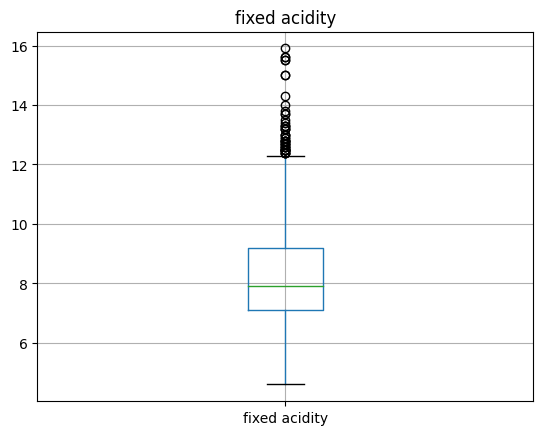

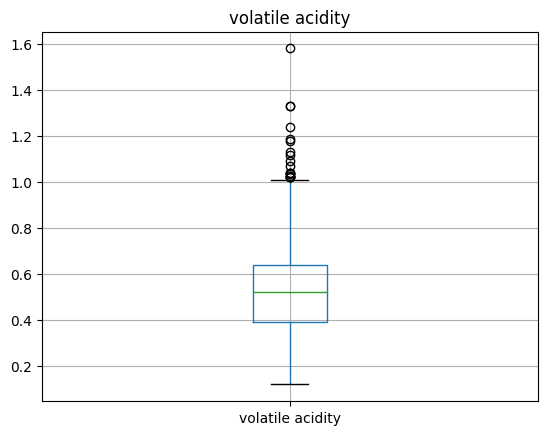

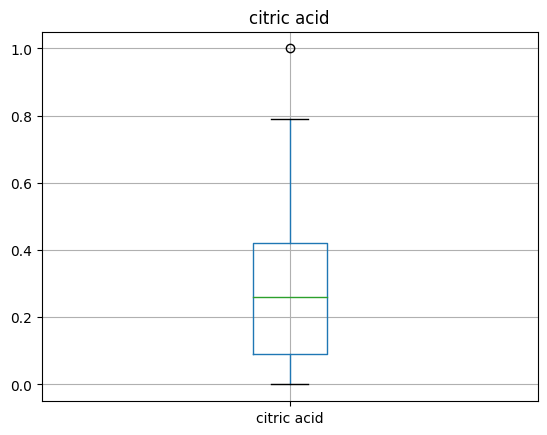

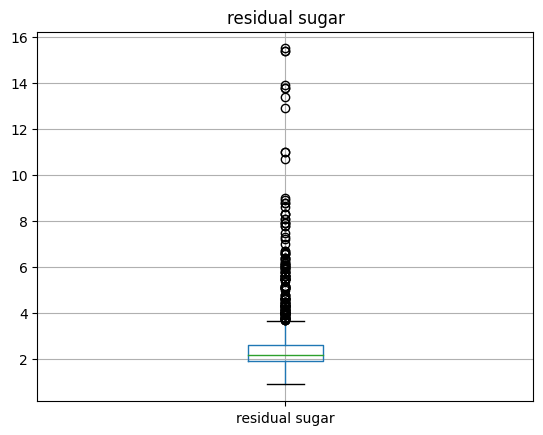

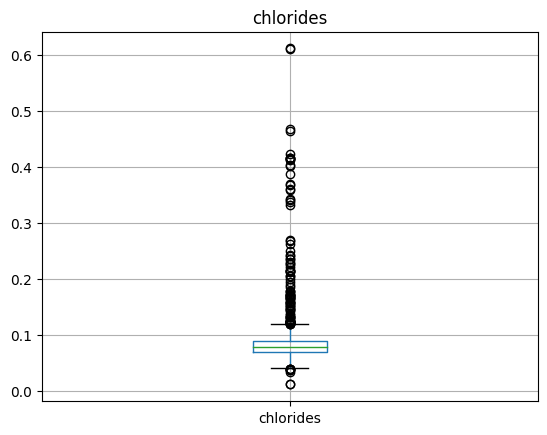

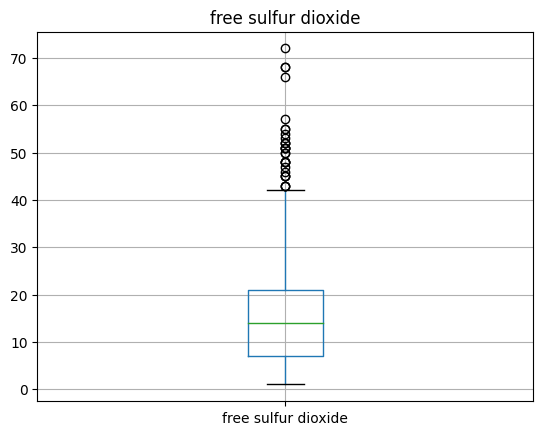

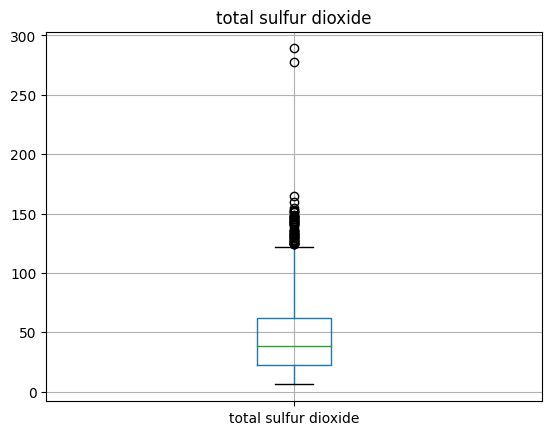

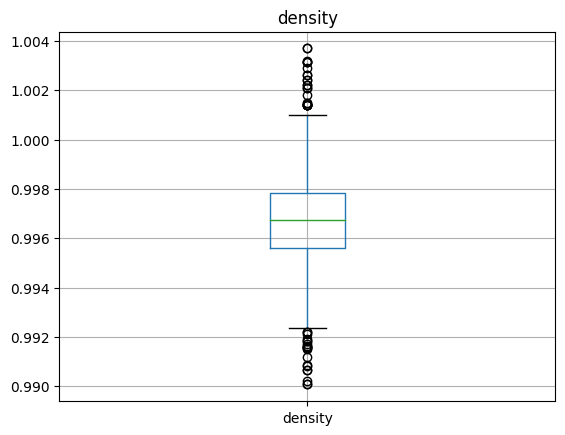

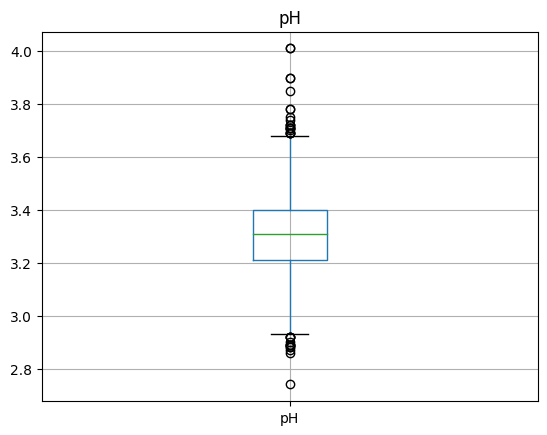

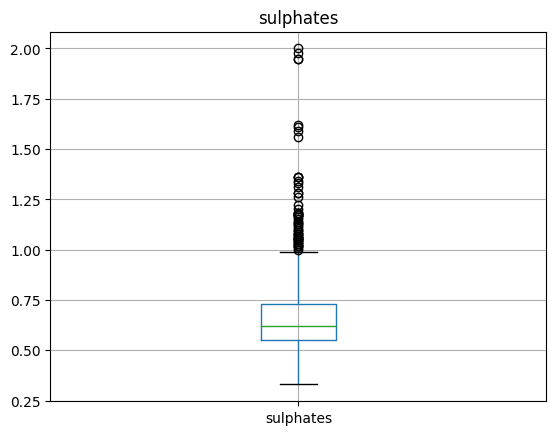

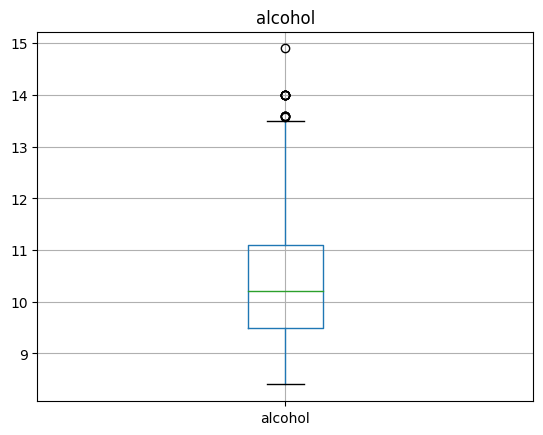

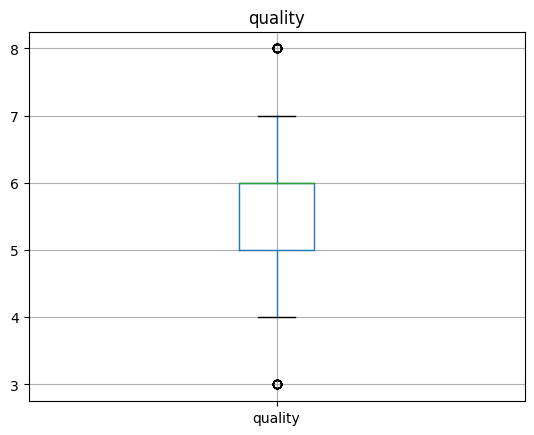

In [ ]:
for column in data.columns:
  plt.figure()
  data.boxplot([column])
  plt.title(column)

In [ ]:
outlier_cols = []
for column in data.columns:
  q1 = data[column].quantile(0.25)
  q3 = data[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
  count = outliers.shape[0]
  print(f"Outliers in {column}: {count}")
  if count > 0:
    outlier_cols.append(column)
print(f'\n\nColumns that contain Outliers: {outlier_cols}')

Outliers in fixed acidity: 49
Outliers in volatile acidity: 19
Outliers in citric acid: 1
Outliers in residual sugar: 155
Outliers in chlorides: 112
Outliers in free sulfur dioxide: 30
Outliers in total sulfur dioxide: 55
Outliers in density: 45
Outliers in pH: 35
Outliers in sulphates: 59
Outliers in alcohol: 13
Outliers in quality: 28


Columns that contain Outliers: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [ ]:
for column in outlier_cols:
  q1 = data[column].quantile(0.25)
  q3 = data[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  data[column] = data[column].clip(lower_bound, upper_bound)

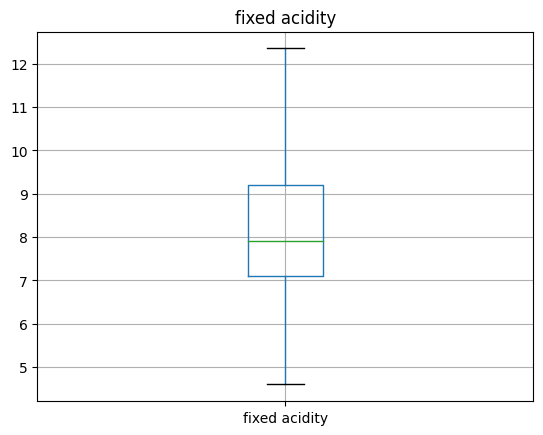

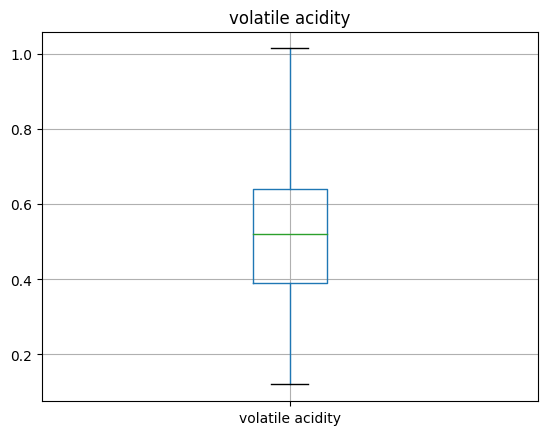

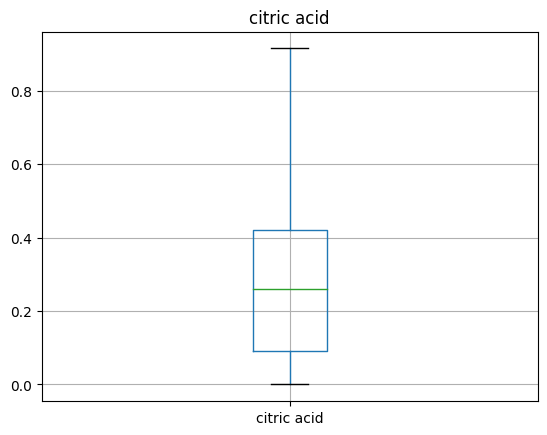

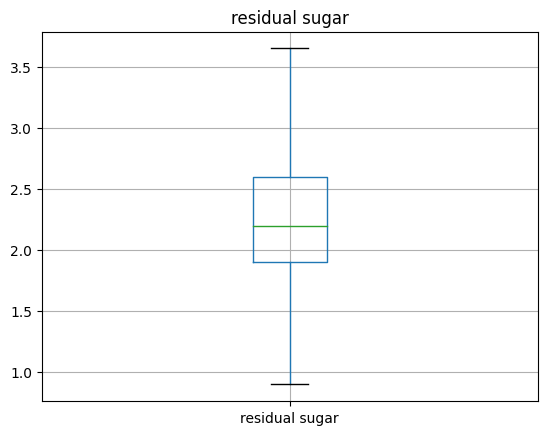

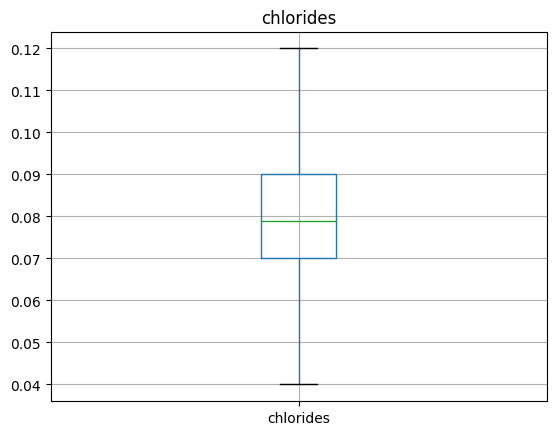

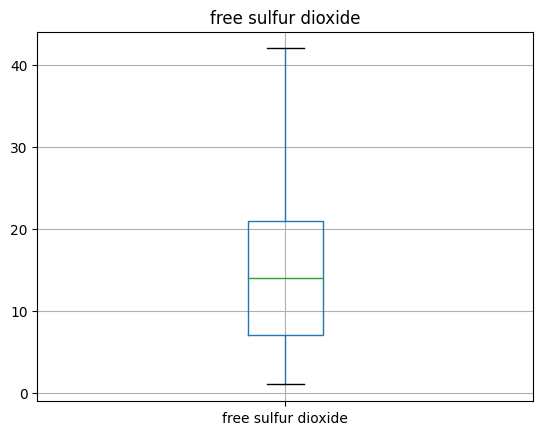

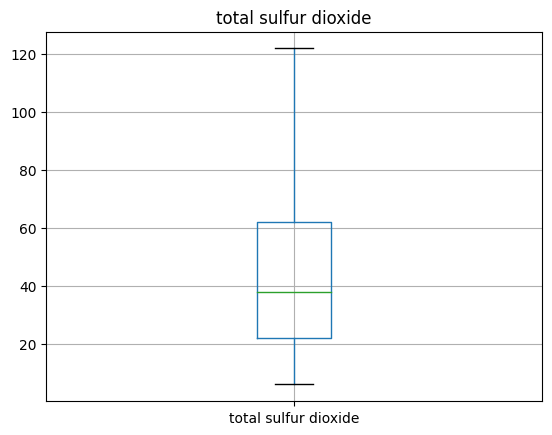

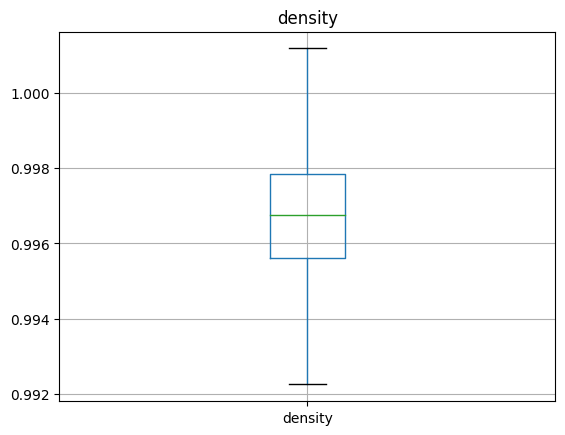

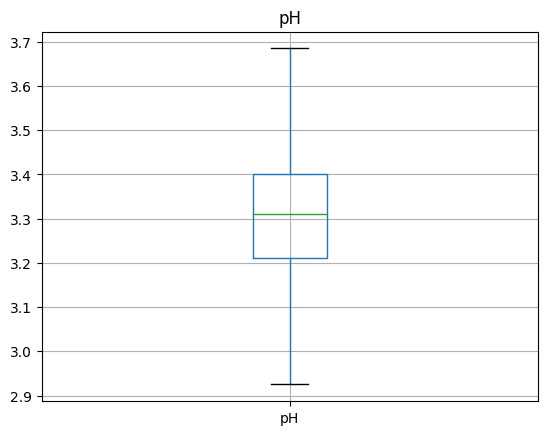

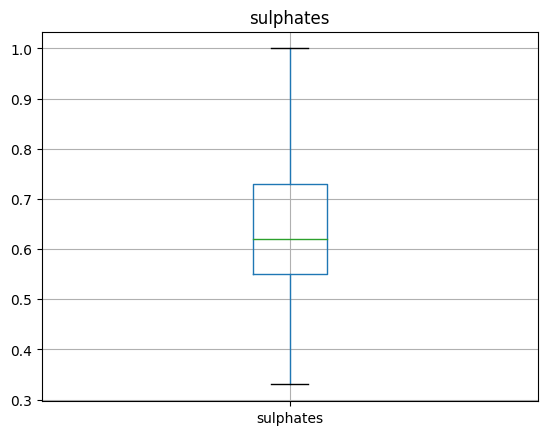

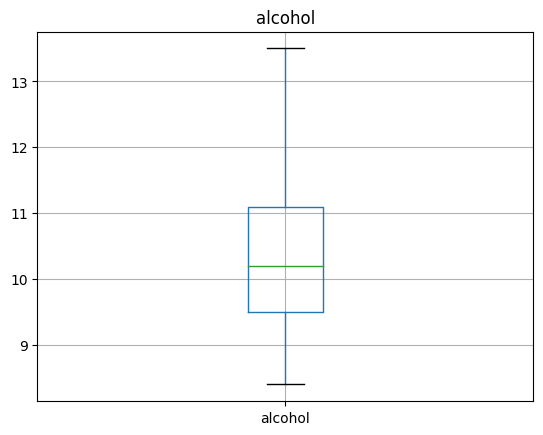

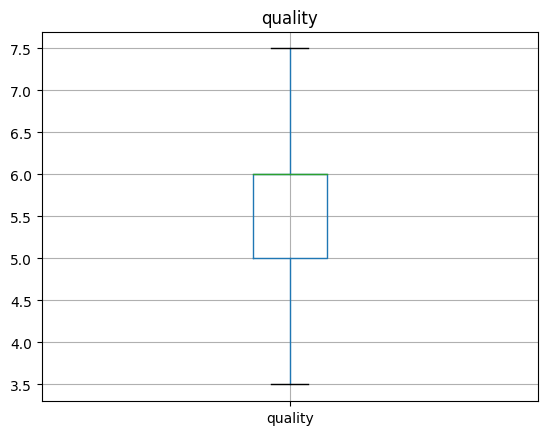

In [ ]:
for column in data.columns:
  plt.figure()
  data.boxplot([column])
  plt.title(column)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
columns = data.columns
scaler = MinMaxScaler()
data[columns] = scaler.fit_transform(data[columns])
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.361290,0.648045,0.000000,0.363636,0.4500,0.243902,0.241379,0.621085,0.769737,0.343284,0.196078,0.375
1,0.412903,0.849162,0.000000,0.618182,0.7250,0.585366,0.525862,0.509228,0.361842,0.522388,0.274510,0.375
2,0.412903,0.715084,0.043716,0.509091,0.6500,0.341463,0.413793,0.531600,0.440789,0.477612,0.274510,0.375
3,0.851613,0.178771,0.612022,0.363636,0.4375,0.390244,0.465517,0.643456,0.309211,0.373134,0.274510,0.625
4,0.361290,0.648045,0.000000,0.363636,0.4500,0.243902,0.241379,0.621085,0.769737,0.343284,0.196078,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.206452,0.536313,0.087432,0.400000,0.6250,0.756098,0.327586,0.296700,0.690789,0.373134,0.411765,0.375
1595,0.167742,0.480447,0.109290,0.472727,0.2750,0.926829,0.387931,0.321309,0.782895,0.641791,0.549020,0.625
1596,0.219355,0.435754,0.142077,0.509091,0.4500,0.682927,0.293103,0.390660,0.651316,0.626866,0.509804,0.625
1597,0.167742,0.586592,0.131148,0.400000,0.4375,0.756098,0.327586,0.360459,0.848684,0.567164,0.352941,0.375


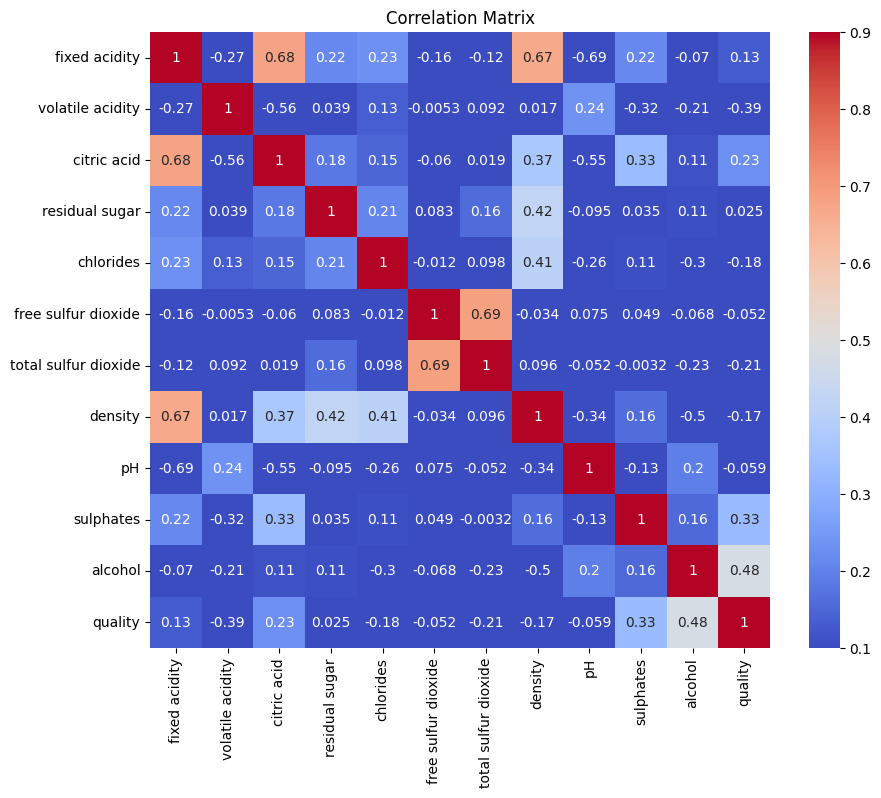

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True,vmin = 0.1,vmax=0.9, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

x = data.drop('quality', axis=1)
y = data['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.022459727775685213
Mean Absolute Error: 0.12233399954632129
R-squared: 0.4143334024974511


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [ ]:
lr2 = LinearRegression()
model2=lr2.fit(x_train_poly, y_train)

In [ ]:
y_pred2 = model2.predict(x_test_poly)

In [ ]:
mse = mean_squared_error(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.035345569192323234
Mean Absolute Error: 0.13442613215124508
R-squared: 0.07831833705173585
